In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset_csv = pd.read_csv('fma-rock-vs-hiphop.csv')
dataset = pd.read_json('echonest-metrics.json', precise_float=True)

In [3]:
dataset_csv.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
dataset.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
10,145,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,120.790,0.650452
100,341,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707
1000,3457,0.081256,0.897197,0.367886,0.104474,0.085845,0.041271,100.744,0.749293


In [5]:
data = pd.merge(dataset, dataset_csv[["track_id", "genre_top"]], on="track_id")

In [6]:
data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,341,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707,Rock
3,46204,0.953349,0.498525,0.552503,0.924391,0.684914,0.028885,78.958,0.430448,Rock
4,46205,0.613229,0.500320,0.487992,0.936811,0.637750,0.030327,112.667,0.824749,Rock


In [7]:
id = {"Hip-Hop" : 0, 
     "Rock": 1}

In [8]:
data.isnull().any()

track_id            False
acousticness        False
danceability        False
energy              False
instrumentalness    False
liveness            False
speechiness         False
tempo               False
valence             False
genre_top           False
dtype: bool

In [9]:
data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,341,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707,Rock
3,46204,0.953349,0.498525,0.552503,0.924391,0.684914,0.028885,78.958,0.430448,Rock
4,46205,0.613229,0.500320,0.487992,0.936811,0.637750,0.030327,112.667,0.824749,Rock


In [10]:
nums = {"genre_top": {"Hip-Hop": 0, "Rock": 1}}
data = data.replace(nums)
data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0
2,341,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707,1
3,46204,0.953349,0.498525,0.552503,0.924391,0.684914,0.028885,78.958,0.430448,1
4,46205,0.613229,0.500320,0.487992,0.936811,0.637750,0.030327,112.667,0.824749,1


In [11]:
# Create a correlation matrix
corr_metrics = data.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,1,-0.372282,0.0494541,0.140703,-0.275623,0.0482307,-0.0269951,-0.0253918,0.0100698,-0.00462409
acousticness,-0.372282,1,-0.0289537,-0.281619,0.19478,-0.0199914,0.072204,-0.0263097,-0.0138406,0.0977477
danceability,0.0494541,-0.0289537,1,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165,-0.484457
energy,0.140703,-0.281619,-0.242032,1,0.0282377,0.113331,-0.109983,0.195227,0.0386027,0.12486
instrumentalness,-0.275623,0.19478,-0.255217,0.0282377,1,-0.0910218,-0.366762,0.022215,-0.219967,0.326037
liveness,0.0482307,-0.0199914,-0.106584,0.113331,-0.0910218,1,0.0411725,0.00273169,-0.0450931,-0.00706991
speechiness,-0.0269951,0.072204,0.276206,-0.109983,-0.366762,0.0411725,1,0.00824055,0.149894,-0.496495
tempo,-0.0253918,-0.0263097,-0.242089,0.195227,0.022215,0.00273169,0.00824055,1,0.0522212,0.114571
valence,0.0100698,-0.0138406,0.473165,0.0386027,-0.219967,-0.0450931,0.149894,0.0522212,1,-0.246701
genre_top,-0.00462409,0.0977477,-0.484457,0.12486,0.326037,-0.00706991,-0.496495,0.114571,-0.246701,1


In [12]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence' ]

In [13]:
data_x = data[features]
data_x.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707
3,0.953349,0.498525,0.552503,0.924391,0.684914,0.028885,78.958,0.430448
4,0.613229,0.500320,0.487992,0.936811,0.637750,0.030327,112.667,0.824749


In [14]:
labels = data['genre_top']

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(data_x)

In [17]:
len(scaled_train_features[0])

8

In [18]:
len(scaled_train_features)

4802

In [19]:
pd.DataFrame(scaled_train_features).head(5)

,0,1,2,3,4,5,6,7
0,-0.191210,1.304420,0.038316,-1.576494,-0.068755,0.373034,1.153979,0.462287
1,-0.306036,0.501886,0.788176,-1.599809,-0.545463,2.446155,0.007914,-0.690811
2,1.331757,0.175777,-2.008607,0.222085,-0.548779,-0.217608,-0.207122,-0.085167
3,1.266742,0.337737,-0.297606,0.850834,3.300761,-0.520786,-1.403866,-0.086139
4,0.342755,0.347522,-0.561966,0.883828,2.987475,-0.510901,-0.412394,1.392836


In [20]:
from sklearn.decomposition import PCA
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Variance')

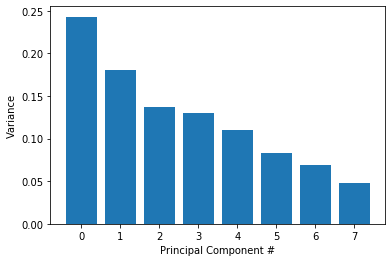

In [22]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(8), exp_variance)
ax.set_xlabel('Principal Component #')
ax.set_ylabel('Variance')

In [23]:
cum_exp_variance = np.cumsum(exp_variance)
cum_exp_variance

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

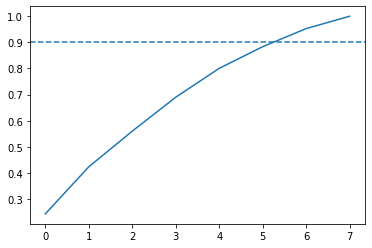

In [24]:
plt.plot(cum_exp_variance)
plt.axhline(y=0.9, linestyle='--')

In [25]:
n_comp = 6
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_comp, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [26]:
len(pca_projection[0])

6

In [27]:
len(pca_projection)

4802

# Decision Tree Classifier

In [28]:
X_train, X_test, y_train, y_test = train_test_split(pca_projection, labels, random_state=10)

In [29]:
model_tree = DecisionTreeClassifier(random_state=10)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [30]:
pred = model_tree.predict(X_test)

In [31]:
len(pred)

1201

In [32]:
accuracy_score(y_true = y_test, y_pred = pred)

0.8709408825978351

In [33]:
from sklearn.metrics import classification_report
tree_report = classification_report(y_test, pred)

In [34]:
print("Decision Tree: \n", tree_report)

Decision Tree: 
               precision    recall  f1-score   support

           0       0.66      0.66      0.66       229
           1       0.92      0.92      0.92       972

    accuracy                           0.87      1201
   macro avg       0.79      0.79      0.79      1201
weighted avg       0.87      0.87      0.87      1201



# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
Lreg_model = LogisticRegression(random_state=10)
Lreg_model.fit(X_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
pred_Lreg = Lreg_model.predict(X_test)

In [38]:
accuracy_score(y_true=y_test, y_pred=pred_Lreg)

0.880932556203164

In [39]:
Lreg_report = classification_report(y_test, pred_Lreg)
print("", Lreg_report)

               precision    recall  f1-score   support

           0       0.75      0.57      0.65       229
           1       0.90      0.95      0.93       972

    accuracy                           0.88      1201
   macro avg       0.83      0.76      0.79      1201
weighted avg       0.87      0.88      0.87      1201



# Without PCA And Using Tree

In [40]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(data_x, labels, random_state=10)

In [41]:
model_tree_p = DecisionTreeClassifier(random_state=10)
model_tree_p.fit(X_train_p, y_train_p)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [42]:
pred_p = model_tree_p.predict(X_test_p)

In [43]:
accuracy_score(y_true = y_test_p, y_pred = pred_p)

0.8950874271440467

In [44]:
w_pca_report = classification_report(y_test_p, pred_p)
print("Without_pca: \n", w_pca_report)

Without_pca: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.73       229
           1       0.94      0.93      0.94       972

    accuracy                           0.90      1201
   macro avg       0.83      0.83      0.83      1201
weighted avg       0.90      0.90      0.90      1201



# Without Pca and Using Regression

In [45]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(data_x, labels, random_state=10)

In [46]:
Lreg_model_l = LogisticRegression(random_state = 10)

In [47]:
Lreg_model_l.fit(X_train_l, y_train_l)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
pred_l = Lreg_model_l.predict(X_test_l)

In [49]:
accuracy_score(y_true=y_test_l, y_pred=pred_l)

0.8892589508742714

In [50]:
w_pca_report_l = classification_report(y_test_p, pred_p)
print("Without_pca and Regression: \n", w_pca_report_l)

Without_pca and Regression: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.73       229
           1       0.94      0.93      0.94       972

    accuracy                           0.90      1201
   macro avg       0.83      0.83      0.83      1201
weighted avg       0.90      0.90      0.90      1201



# Balancing

<i>We can see that the precision for prediction of Rock genre is pretty high but the precision for Hip-Hop genre is low as compared to Rock. So we will try to balance the data to make sure the precision for predicting both the categories is pretty much the same</i>

In [54]:
hop_only = data.loc[data["genre_top"] == 0]

In [56]:
rock_only = data.loc[data["genre_top"] == 1].sample(len(hop_only), random_state=10)

In [58]:
b_data = pd.concat([rock_only, hop_only])

In [61]:
b_data_x = b_data[features]
b_labels = b_data["genre_top"]

In [63]:
pca_projection_b = pca.fit_transform(scaler.fit_transform(b_data_x))
pca_projection_b

array([[ 0.82033812,  0.32712703, -1.66822844,  0.58030623, -0.61416288,
        -0.3560381 ],
       [-2.13573793,  0.88098724,  1.34538768,  2.45567554,  1.0669125 ,
        -1.40129148],
       [-3.24374193,  0.60462329,  2.27685318, -1.15741106, -0.04261633,
        -0.51753222],
       ...,
       [ 2.38516199, -0.75860297, -1.09732784, -0.02426702,  0.12914544,
         0.12640233],
       [ 3.1052004 , -0.50492689,  3.16315064, -0.97705932, -1.71258342,
         0.68748989],
       [ 3.54057207, -0.47773479,  2.4559007 ,  1.32687085, -0.83043729,
        -0.13855526]])

In [64]:
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(pca_projection_b, b_labels, random_state=10)

In [65]:
# Creating a tree
b_tree = DecisionTreeClassifier(random_state=10)
b_tree.fit(b_X_train, b_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [66]:
b_pred = b_tree.predict(b_X_test)

In [67]:
print("Decision Tree: \n", classification_report(b_y_test, b_pred))

Decision Tree: 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       230
           1       0.76      0.76      0.76       225

    accuracy                           0.76       455
   macro avg       0.76      0.76      0.76       455
weighted avg       0.76      0.76      0.76       455



In [68]:
# Using Regression
b_reg = LogisticRegression(random_state=10)
b_reg.fit(b_X_train, b_y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
b_reg_pred = b_reg.predict(b_X_test)

In [70]:
print("Regression: \n", classification_report(b_y_test, b_reg_pred))

Regression: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       230
           1       0.82      0.81      0.82       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



# Cross Validation

In [71]:
from sklearn.model_selection import KFold, cross_val_score

In [82]:
# Set up our K-fold cross-validation
kf = KFold(n_splits=12, random_state=10)

In [83]:
tree_v = DecisionTreeClassifier(random_state=10)
logreg_v = LogisticRegression(random_state=10)

In [84]:
# Train our models using KFold cv
tree_score = cross_val_score(tree_v, pca_projection, labels, cv=kf)
logit_score = cross_val_score(logreg_v, pca_projection, labels, cv=kf)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [87]:
print(tree_score)
print(logit_score)

[0.89526185 0.83291771 0.81       0.8775     0.8725     0.7325
 0.8125     0.8475     0.8575     0.9025     0.855      0.855     ]
[0.9201995  0.88528678 0.83       0.9425     0.93       0.715
 0.825      0.865      0.8775     0.8775     0.8925     0.8675    ]


In [86]:
# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.8458899625935162 Logistic Regression: 0.8689988570241063


<i>It is clear from the above models that Logistic Regression performs better than the decision tree classifier.</i>